# Scaling Exercise

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle

df = wrangle.wrangle_telco()

In [2]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

## Visualizing Scalers

In [3]:
def visualize_scaler(scaler, scaler_name):
    monthly_charges_scaled = scaler.fit_transform(train[['monthly_charges']])
    fig = plt.figure(figsize=(12, 10))
    gs = plt.GridSpec(2, 2) # subplot with a 2x2 grid
    ax1 = fig.add_subplot(gs[0, :]) # the first row, all the columns
    ax2 = fig.add_subplot(gs[1, 0]) # second row, first column
    ax3 = fig.add_subplot(gs[1, 1]) # second row, second column
    
    ax1.scatter(train.monthly_charges, monthly_charges_scaled)
    ax1.set(xlabel='monthly_charges', ylabel='monthly_charges_scaled', title=scaler_name)
    ax2.hist(train.monthly_charges)
    ax2.set(title='Original')
    ax3.hist(monthly_charges_scaled)
    ax3.set(title='Scaled')

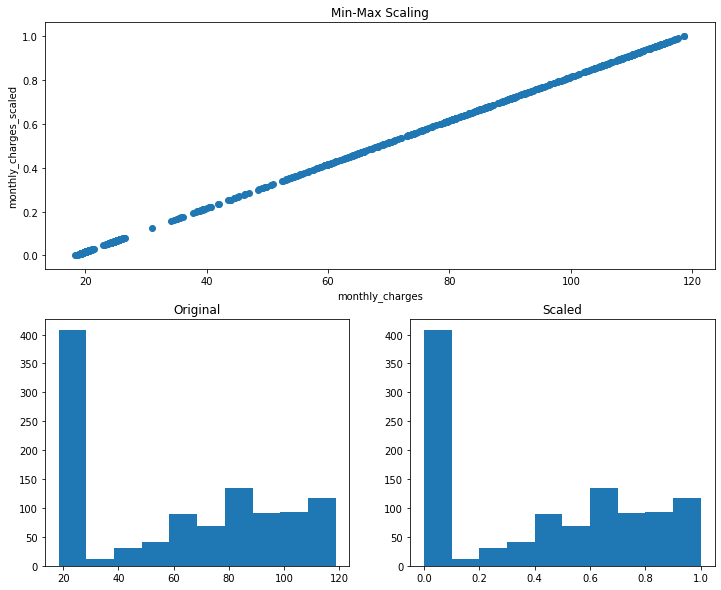

In [4]:
visualize_scaler(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaling')

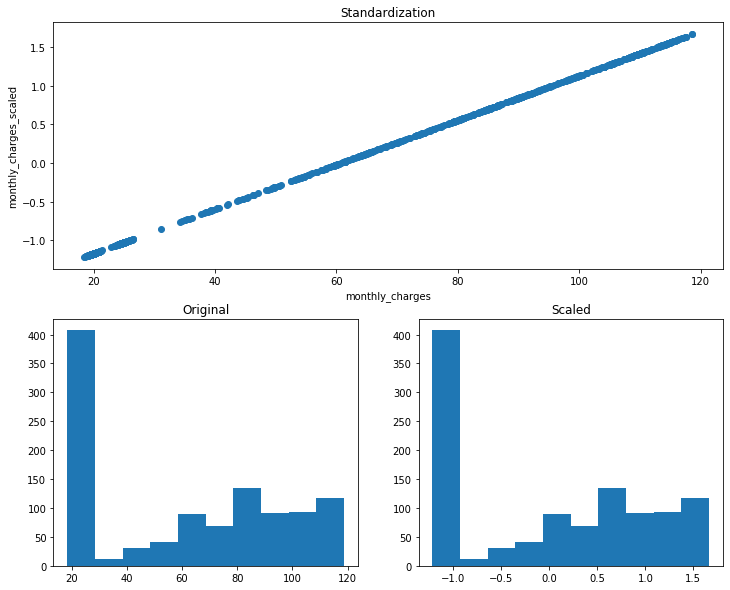

In [6]:
visualize_scaler(sklearn.preprocessing.StandardScaler(), 'Standardization')

## Inverse Scaling

data shapes

- sklearn needs a 2-d structure
- once a scaler (or any sklearn object) is fit, it only works with data of that shape

In [12]:
train[['monthly_charges']]

,monthly_charges
1171,20.20
736,19.35
1485,25.40
1139,25.25
689,64.45
...,...
441,104.90
98,43.95
886,25.10
322,108.65


In [24]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train[['monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['monthly_charges', 'total_charges']])
train_scaled = pd.DataFrame(train_scaled, columns=['monthly_charges_scaled', 'total_charges_scaled'])
train_scaled

scaler.inverse_transform(train_scaled[['monthly_charges_scaled', 'total_charges_scaled']])

array([[  20.2 , 1412.65],
       [  19.35,  212.3 ],
       [  25.4 , 1797.1 ],
       ...,
       [  25.1 , 1789.9 ],
       [ 108.65, 4903.2 ],
       [  19.95,  756.4 ]])

In [25]:
x = np.array([1, 2, 3]).reshape(-1, 1)
x

array([[1],
       [2],
       [3]])

In [26]:
scaler = sklearn.preprocessing.MinMaxScaler()

x_scaled = scaler.fit_transform(x)

In [27]:
(x == scaler.inverse_transform(x_scaled)).all()

True

When might we need to use `.inverse_transform`? When we have data we wish to transform that doesn't map to an observation in the original dataset. 2 scenarios where this can occur:

- KMeans Cluster Centroids
- Interpretation of Regression model coefficients where the model was built on scaled data

In [29]:
# for dealing with floats
np.isclose

<function numpy.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)>

## Quantile Transformer

In [30]:
sklearn.preprocessing.QuantileTransformer?

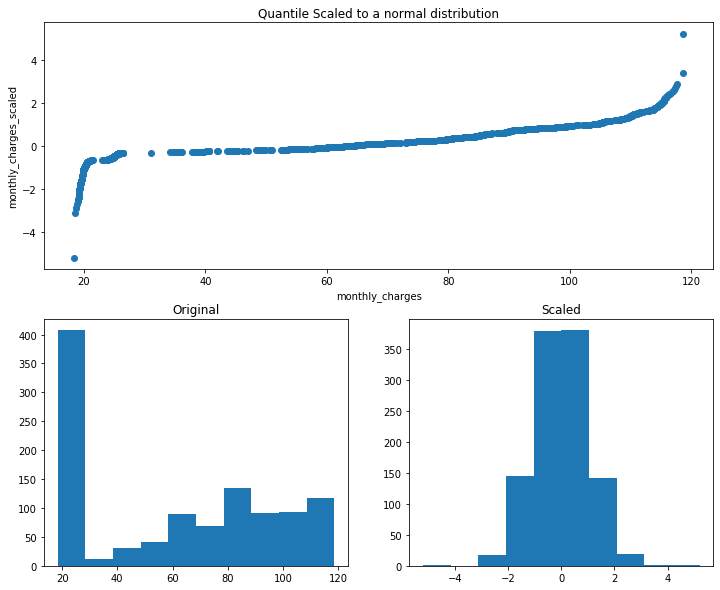

In [31]:
visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(output_distribution='normal'),
    'Quantile Scaled to a normal distribution',
)

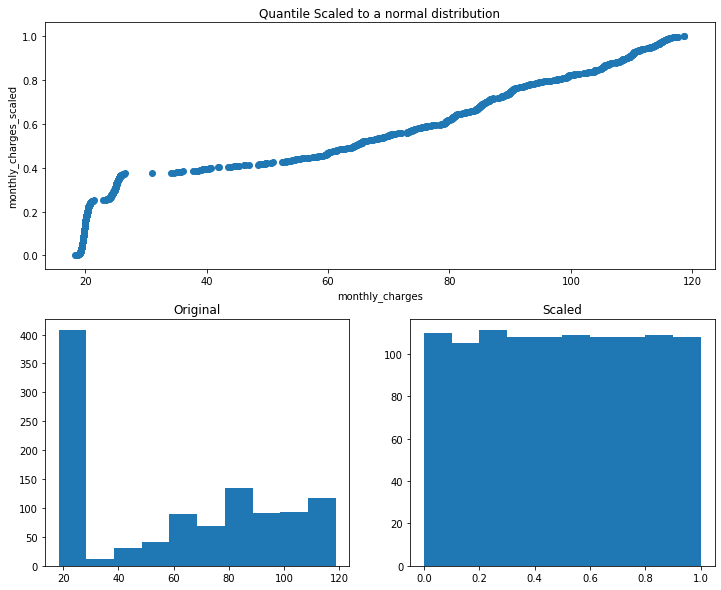

In [32]:
visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(output_distribution='uniform'),
    'Quantile Scaled to a normal distribution',
)

In [38]:
monthly_charges = pd.Series([33.99, 23.99, 49.99, 12.99, 79.99])
example_df = pd.DataFrame(dict(monthly_charges=monthly_charges))
example_df['rank'] = example_df.monthly_charges.rank()
example_df.sort_values(by='monthly_charges')

,monthly_charges,rank
3,12.99,1.0
1,23.99,2.0
0,33.99,3.0
2,49.99,4.0
4,79.99,5.0


## Pipeline Function

In [42]:
# Moved to wrangle.py